In [69]:
import cv2
import imutils
import pytesseract
import numpy as np
import PIL
from IPython import display

In [81]:
def cv2_imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(a))

In [82]:
pytesseract.pytesseract.tesseract_cmd = 'C:\Program Files\Tesseract-OCR\\tesseract'

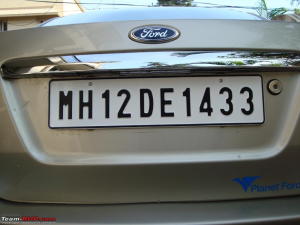

In [84]:
image = cv2.imread('test.jpg')
image = imutils.resize(image, width=300 )
cv2_imshow(image)

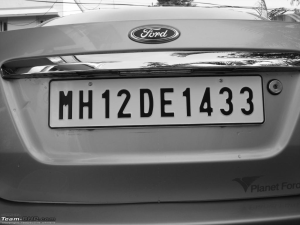

-1

In [85]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
cv2.waitKey(0)

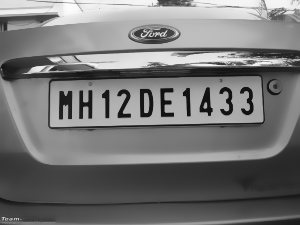

-1

In [86]:
gray_image = cv2.bilateralFilter(gray_image, 11, 17, 17) 
cv2_imshow(gray_image)
cv2.waitKey(0)

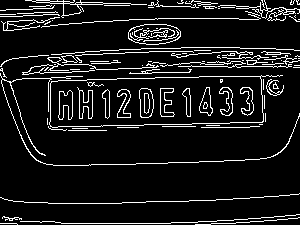

-1

In [87]:
edged = cv2.Canny(gray_image, 30, 200) 
cv2_imshow(edged)
cv2.waitKey(0)

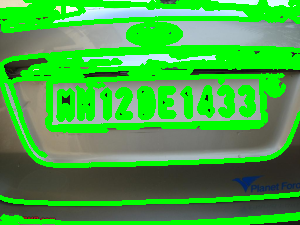

-1

In [88]:
cnts,new = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
image1=image.copy()
cv2.drawContours(image1,cnts,-1,(0,255,0),3)
cv2_imshow(image1)
cv2.waitKey(0)

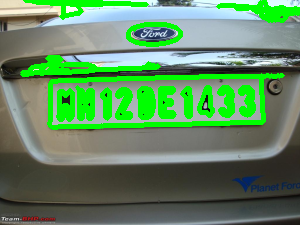

-1

In [89]:
cnts = sorted(cnts, key = cv2.contourArea, reverse = True) [:30]
screenCnt = None
image2 = image.copy()
cv2.drawContours(image2,cnts,-1,(0,255,0),3)
cv2_imshow(image2)
cv2.waitKey(0)

In [90]:
i=7
for c in cnts:
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.018 * perimeter, True)
        if len(approx) == 4: 
                screenCnt = approx
        x,y,w,h = cv2.boundingRect(c) 
        new_img=image[y:y+h,x:x+w]
        cv2.imwrite('./'+str(i)+'.png',new_img)
        i+=1
        break                

In [91]:
def removeOther(s):
    t = ""
    for i in s:
        if(i.isalpha() or i.isdigit()):
            t+=i
    return t

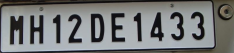

Number plate is: MH12DE1433


In [92]:
Cropped_loc = './7.png'
image = cv2.imread(Cropped_loc)
cv2_imshow(image)
config ='--oem 3 -l eng --psm 6 -c tessedit_char_whitelist = ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
plate = pytesseract.image_to_string(Cropped_loc, lang='eng', config=custom_config)
plate = removeOther(plate)
print("Number plate is:", plate)
cv2.waitKey(0)
cv2.destroyAllWindows()